In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_year4= pd.read_excel('4__year.xlsx')

In [ ]:
df_year4

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.159290,0.46240,0.077730,1.16830,-44.8530,0.467020,0.189480,0.82895,1.12230,0.38330,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.05600,b'0'
1,-0.127430,0.46243,0.269170,1.75170,7.5970,0.000925,-0.127430,1.16250,1.29440,0.53757,...,-0.089372,-0.237040,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.47250,b'0'
2,0.070488,0.23570,0.527810,3.23930,125.6800,0.163670,0.086895,2.87180,1.05740,0.67689,...,0.054286,0.104130,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.78180,b'0'
3,0.136760,0.40538,0.315430,1.87050,19.1150,0.504970,0.136760,1.45390,1.11440,0.58938,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.64840,b'0'
4,-0.110080,0.69793,0.188780,1.27130,-15.3440,0.000000,-0.110080,0.43282,1.73500,0.30207,...,0.439880,-0.364400,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.03600,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,b'1'
9788,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,b'1'
9789,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,b'1'
9790,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,b'1'


In [ ]:
# Converted all features to numeric (invalid strings become NaN)
# Excluded the target column from this step
feature_cols = df_year4.columns[:-1]  # assuming last column is 'class'
df_year4[feature_cols] = df_year4[feature_cols].apply(pd.to_numeric, errors='coerce')

#  Clean the target column: convert from bytes (e.g., b'0') to integer
df_year4['class'] = df_year4['class'].astype(str).str.extract(r'(\d)').astype(int)

In [ ]:
# Separated features and target
X = df_year4.iloc[:, :-1]  # first 64 columns (financial features)
y = df_year4.iloc[:, -1]   # last column ('class')

In [ ]:
from sklearn.impute import KNNImputer


In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

In [ ]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Split the imbalanced data (80% train, 20% test)
#X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
import shap


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_lr = []
cm_lr=[]
roc_lr = {}
shap_values_lr = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (bankrupt)


        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_threshold = thresholds[np.argmax(f1_scores)]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_lr.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_lr.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_lr[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(pipeline)
        shap_values = explainer.shap_values(X_test)
        shap_values_lr.append({name:shap_values}) '''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_lr = pd.DataFrame(results_lr)

# Round for readability
results_df_lr = results_df_lr.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_lr)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8591,0.1686,0.4272,0.8831,0.2418,0.7136
1,BorderlineSMOTE,0.8106,0.1436,0.5243,0.8265,0.2255,0.7127
2,ADASYN,0.8673,0.1796,0.4272,0.8917,0.2529,0.7126
3,SVMSMOTE,0.8351,0.1519,0.4660,0.8556,0.2291,0.7077
4,SMOTEENN,0.8535,0.1691,0.4563,0.8755,0.2467,0.7189
5,SMOTETomek,0.8525,0.1655,0.4466,0.8750,0.2415,0.7129


SMOTE


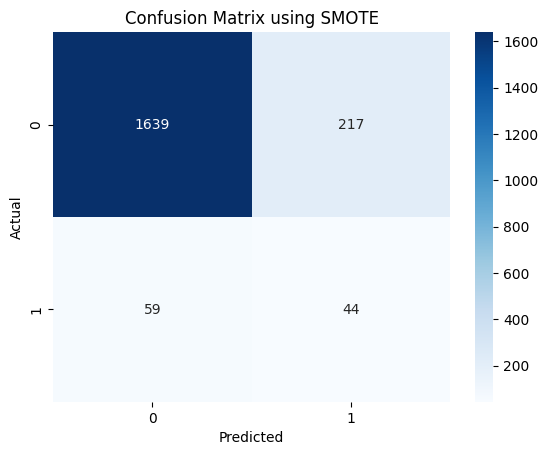

BorderlineSMOTE


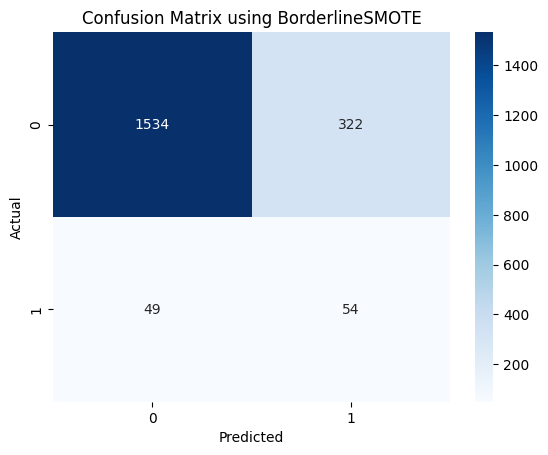

ADASYN


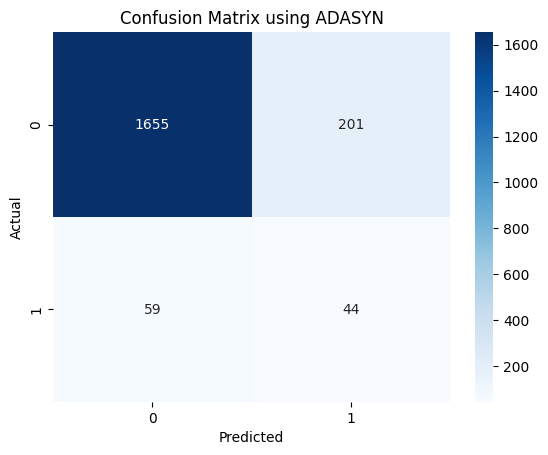

SVMSMOTE


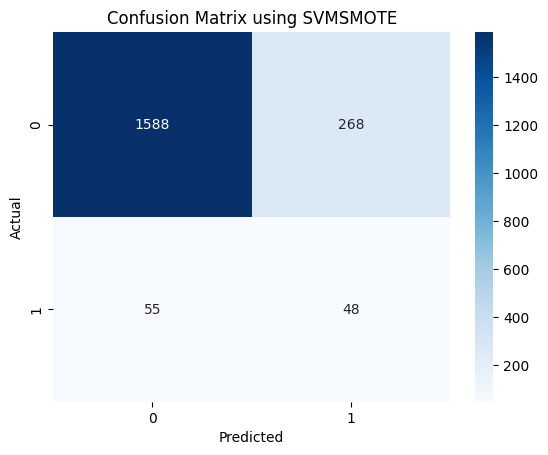

SMOTEENN


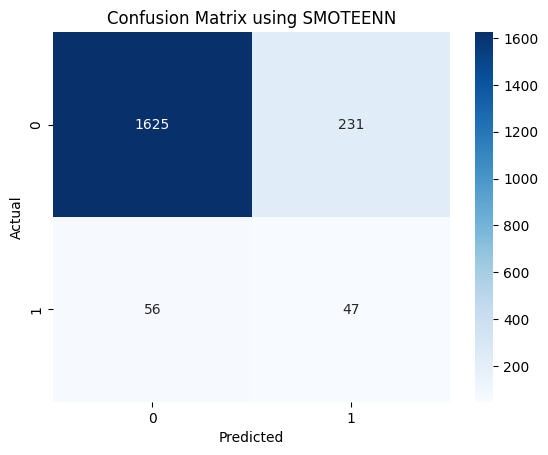

SMOTETomek


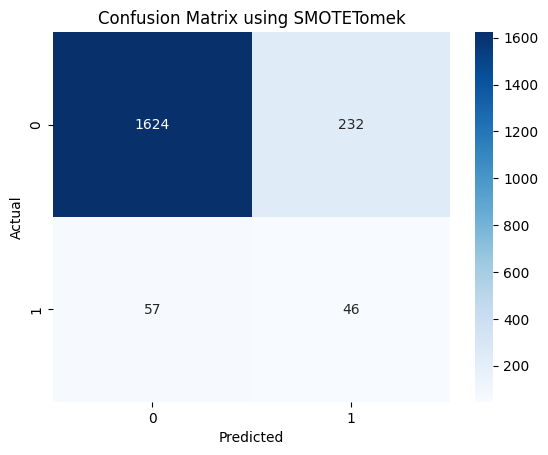

In [ ]:
#confusion matrix plot
for x in cm_lr:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

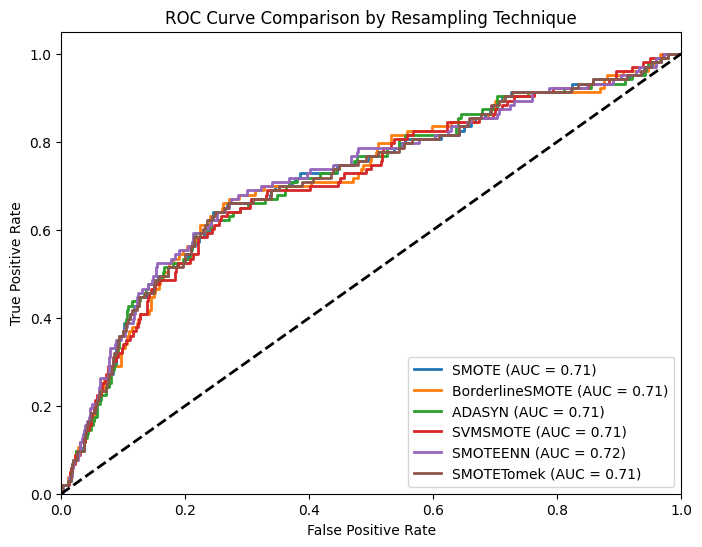

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_lr.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_svm = []
cm_svm=[]
roc_svm = {}
shap_values_svm = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', SVC(class_weight='balanced', kernel='rbf', C=.1, probability=True, random_state=42))])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]



        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_svm.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_svm.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_svm[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_svm = pd.DataFrame(results_svm)

# Round for readability
results_df_svm = results_df_svm.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_svm)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.7295,0.1009,0.5243,0.7408,0.1693,0.6714
1,BorderlineSMOTE,0.7800,0.1095,0.4466,0.7985,0.1759,0.6750
2,ADASYN,0.6958,0.0926,0.5437,0.7042,0.1582,0.6720
3,SVMSMOTE,0.8969,0.1633,0.2330,0.9337,0.1920,0.6795
4,SMOTEENN,0.7004,0.0926,0.5340,0.7096,0.1578,0.6713
5,SMOTETomek,0.7279,0.1004,0.5243,0.7392,0.1685,0.6715


SMOTE


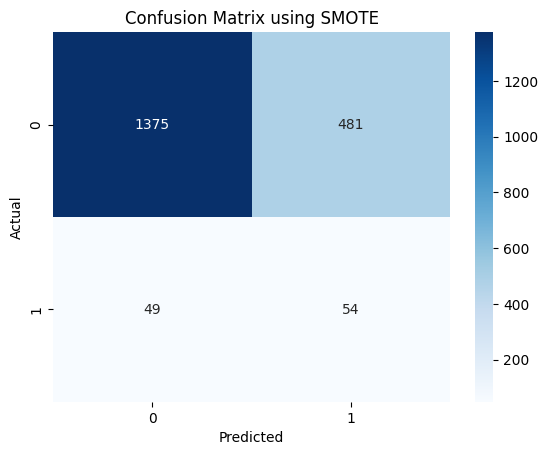

BorderlineSMOTE


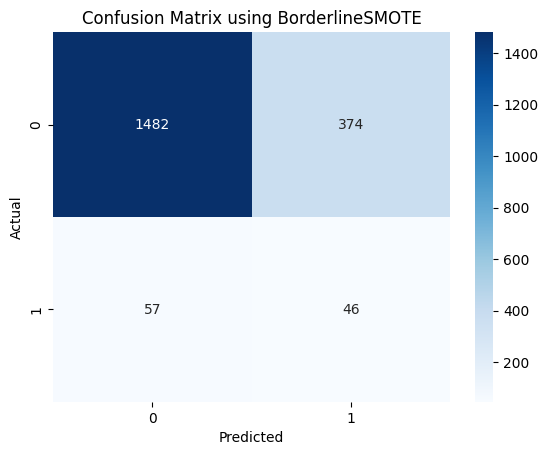

ADASYN


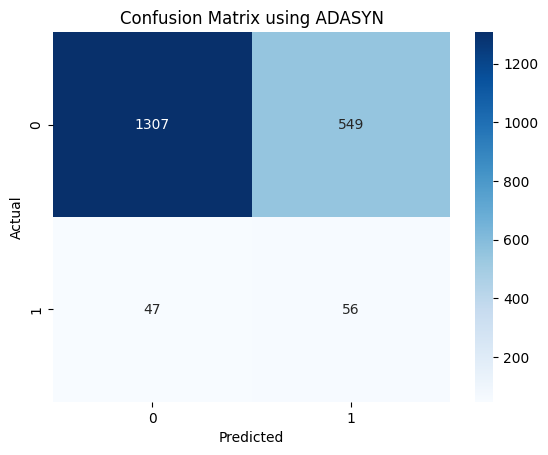

SVMSMOTE


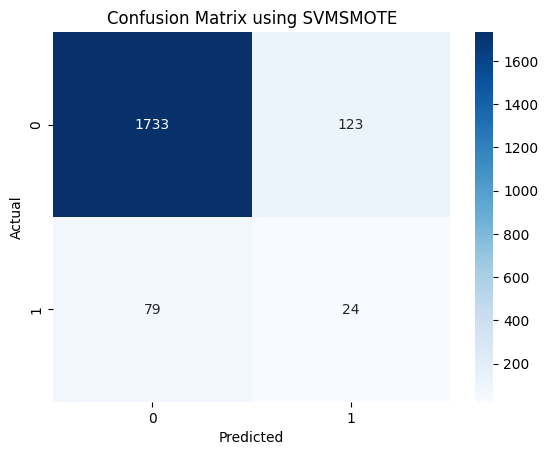

SMOTEENN


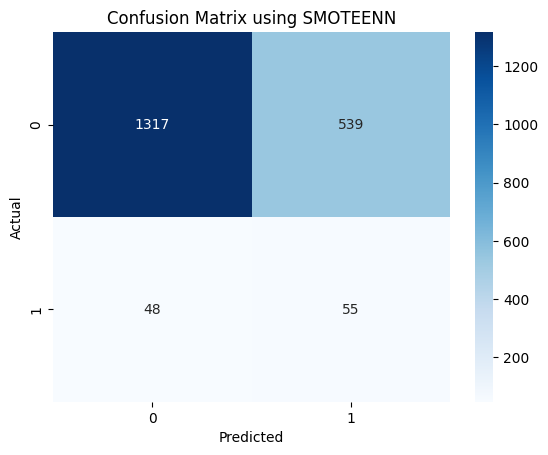

SMOTETomek


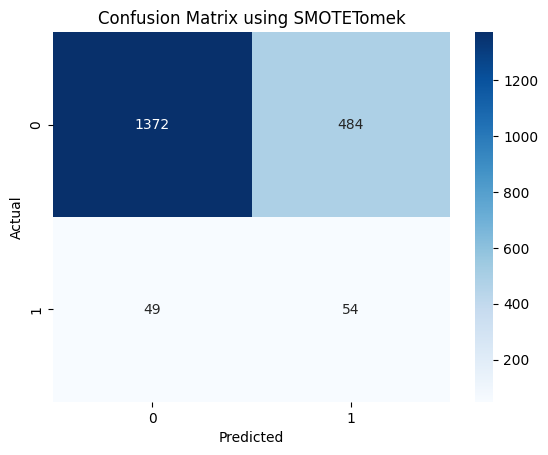

In [ ]:
#confusion matrix plot
for x in cm_svm:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

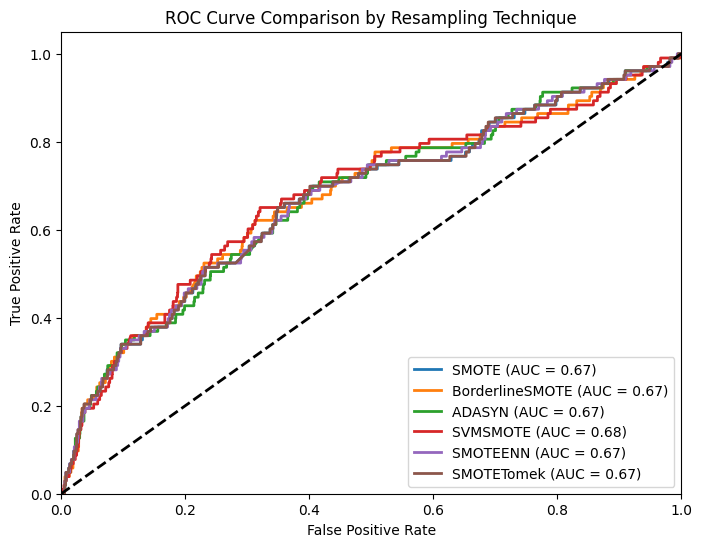

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_svm.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_rf = []
cm_rf=[]
roc_rf = {}
shap_values_rf = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = RandomForestClassifier(class_weight="balanced", random_state=42)
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.3).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_rf.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_rf.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_rf[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_rf = pd.DataFrame(results_rf)

# Round for readability
results_df_rf = results_df_rf.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_rf)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8076,0.1432,0.5340,0.8227,0.2259,0.7856
1,BorderlineSMOTE,0.8627,0.1732,0.4272,0.8869,0.2465,0.7740
2,ADASYN,0.8147,0.1448,0.5146,0.8314,0.2260,0.7798
3,SVMSMOTE,0.8770,0.1974,0.4369,0.9014,0.2719,0.7842
4,SMOTEENN,0.7085,0.1201,0.7184,0.7080,0.2058,0.7803
5,SMOTETomek,0.8076,0.1451,0.5437,0.8222,0.2290,0.7836


SMOTE


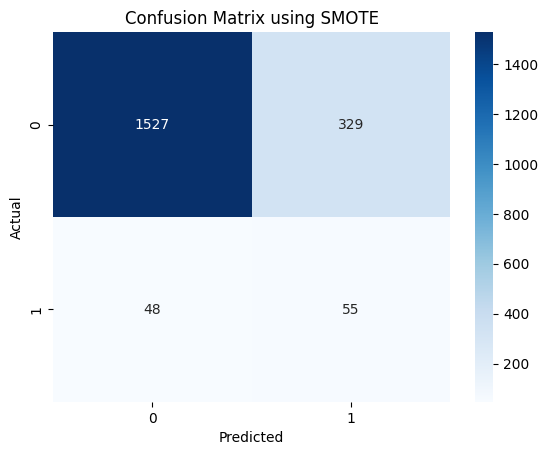

BorderlineSMOTE


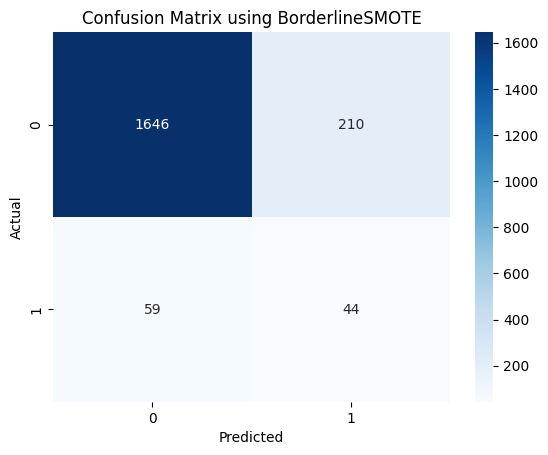

ADASYN


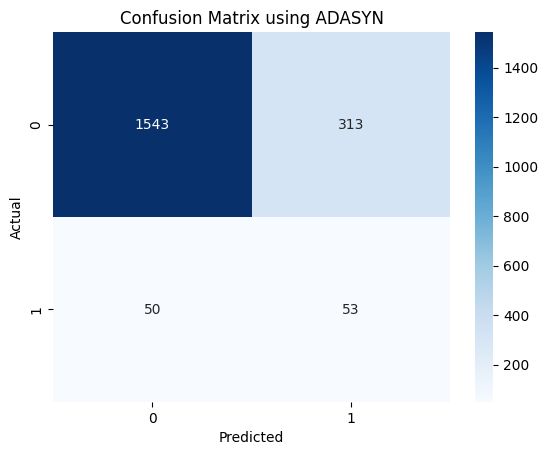

SVMSMOTE


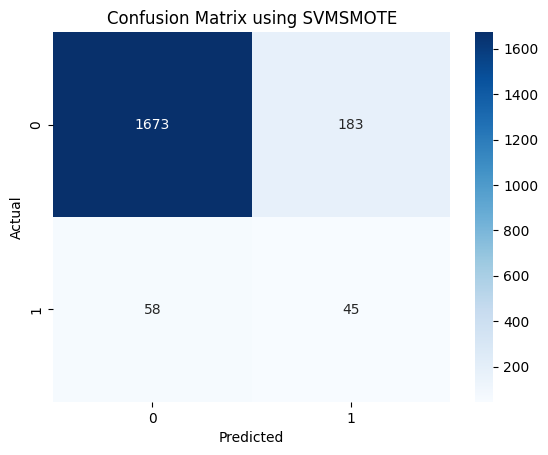

SMOTEENN


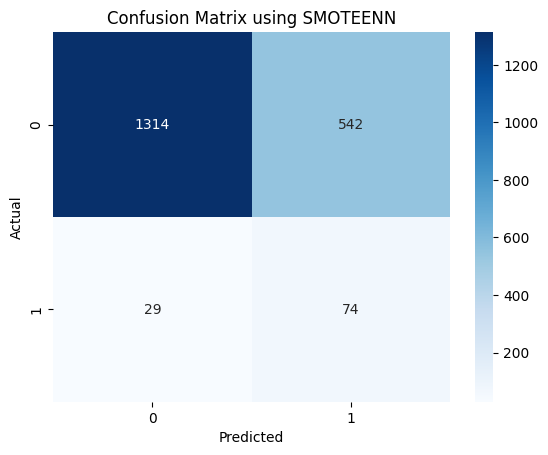

SMOTETomek


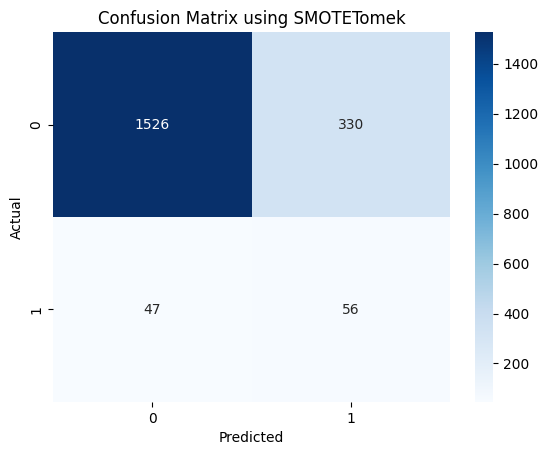

In [ ]:
#confusion matrix plot
for x in cm_rf:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

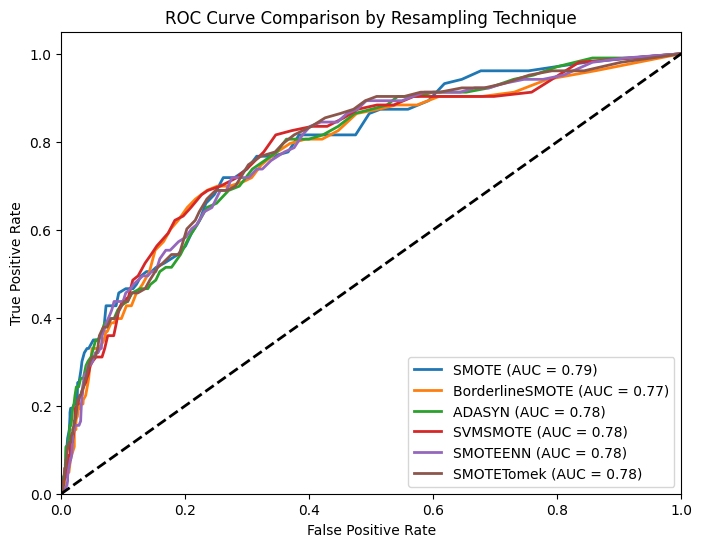

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_rf.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_xgb = []
cm_xgb=[]
roc_xgb = {}
shap_values_xgb = []


for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:

        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = XGBClassifier(eval_metric='logloss',
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        )
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= 0.1).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_xgb.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_xgb.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_xgb[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_xgb.append({name:shap_values})

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")



Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_xgb = pd.DataFrame(results_xgb)

# Round for readability
results_df_xgb = results_df_xgb.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_xgb)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.6450,0.1163,0.8882,0.6317,0.2056,0.8457
1,BorderlineSMOTE,0.7005,0.1301,0.8421,0.6927,0.2254,0.8508
2,ADASYN,0.6133,0.1064,0.8750,0.5991,0.1897,0.8419
3,SVMSMOTE,0.7536,0.1538,0.8355,0.7491,0.2597,0.8571
4,SMOTEENN,0.5926,0.1039,0.9013,0.5757,0.1863,0.8438
5,SMOTETomek,0.6287,0.1104,0.8750,0.6152,0.1960,0.8485


SMOTE


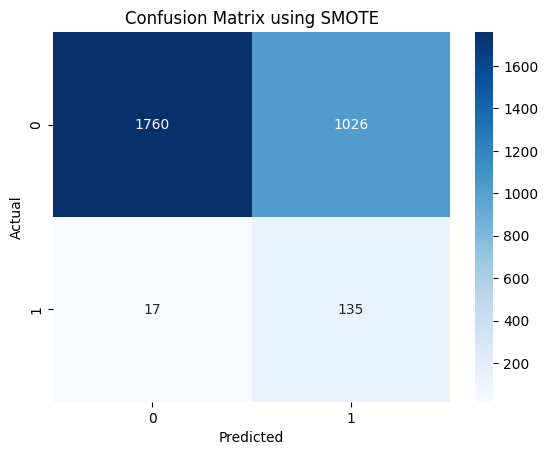

BorderlineSMOTE


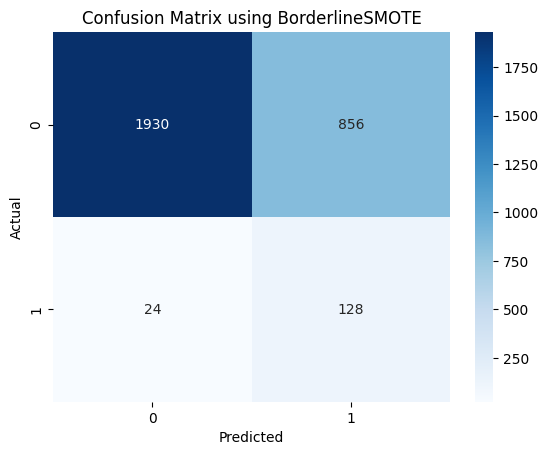

ADASYN


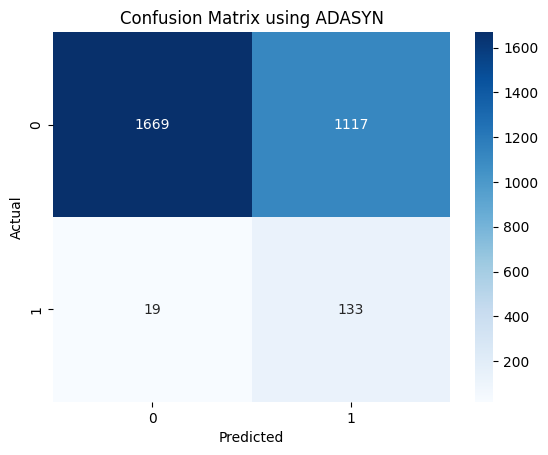

SVMSMOTE


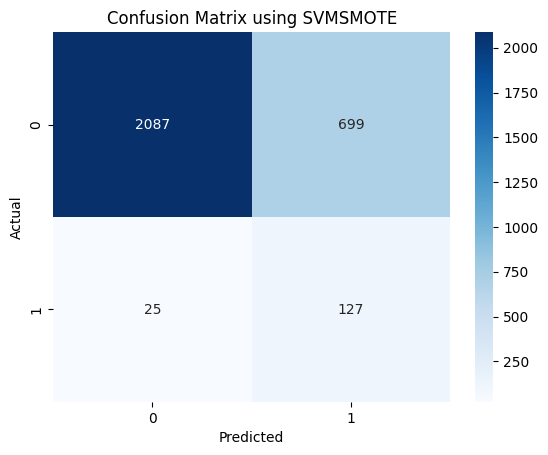

SMOTEENN


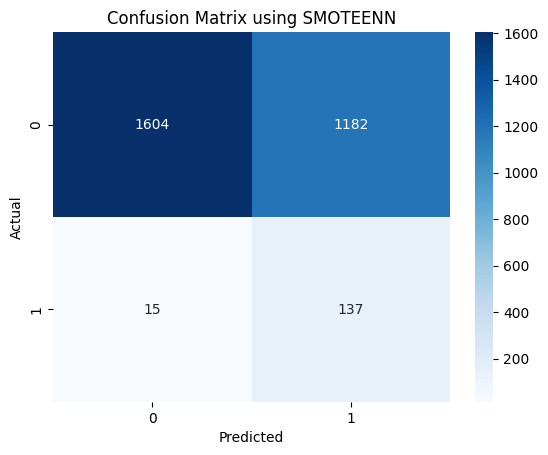

SMOTETomek


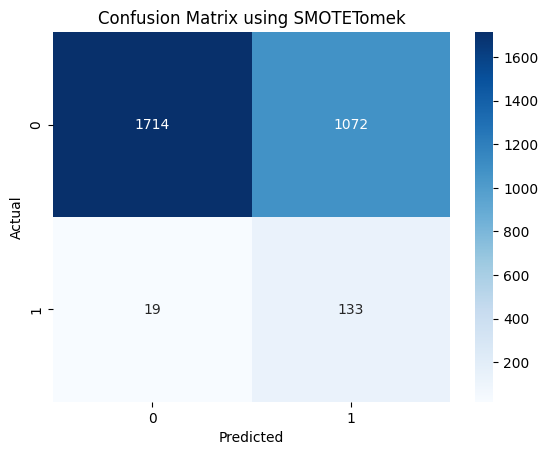

In [ ]:
#confusion matrix plot
for x in cm_xgb:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

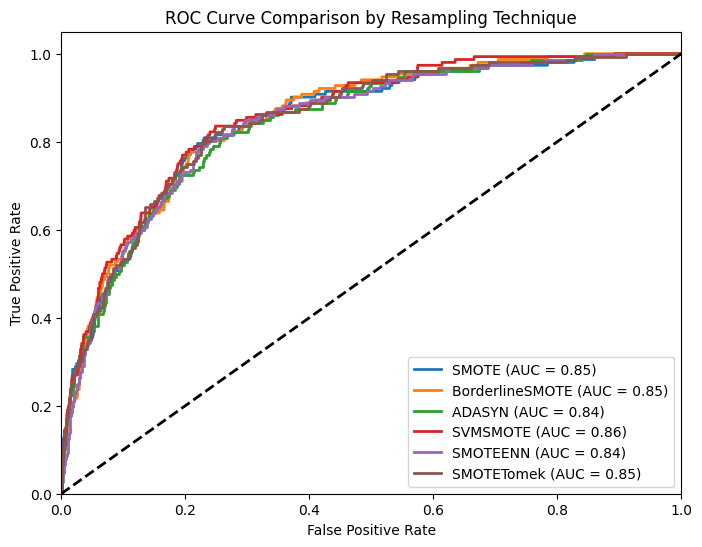

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_xgb.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

SMOTE


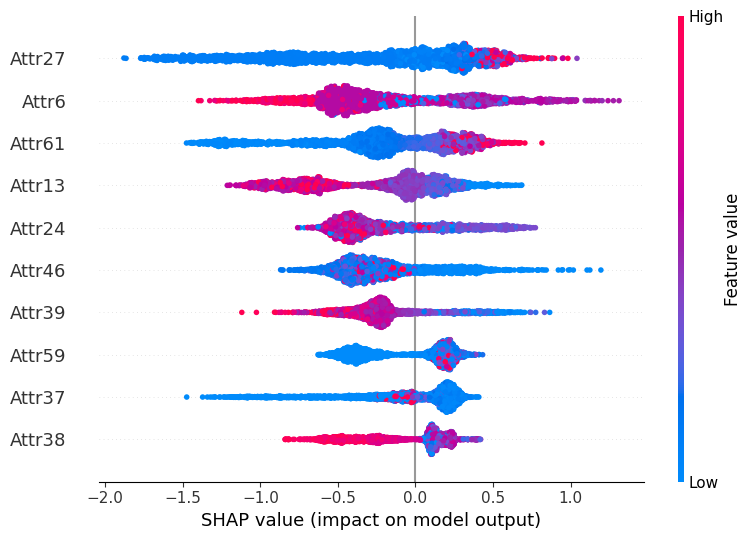

BorderlineSMOTE


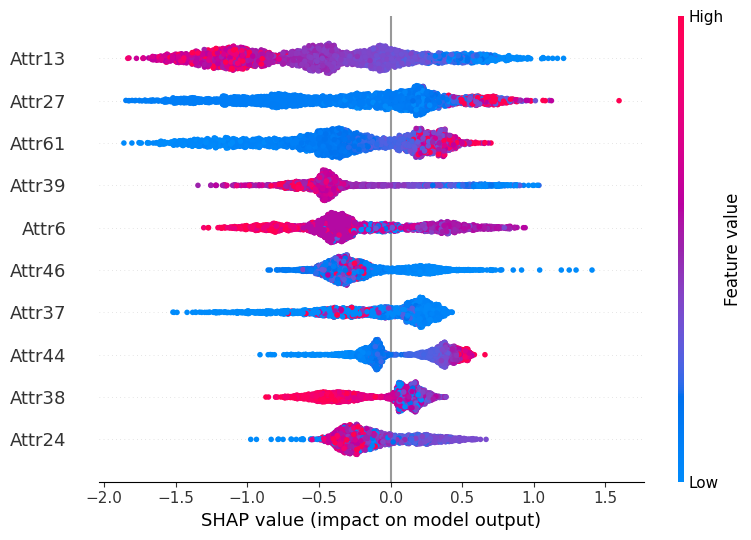

ADASYN


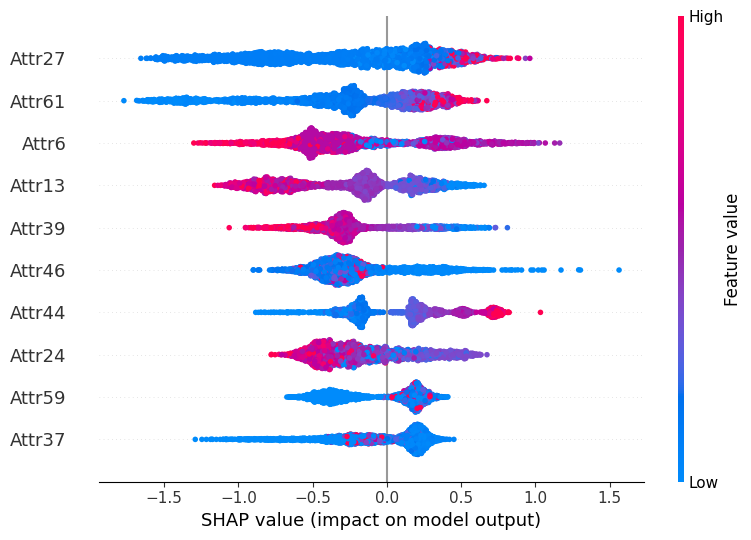

SVMSMOTE


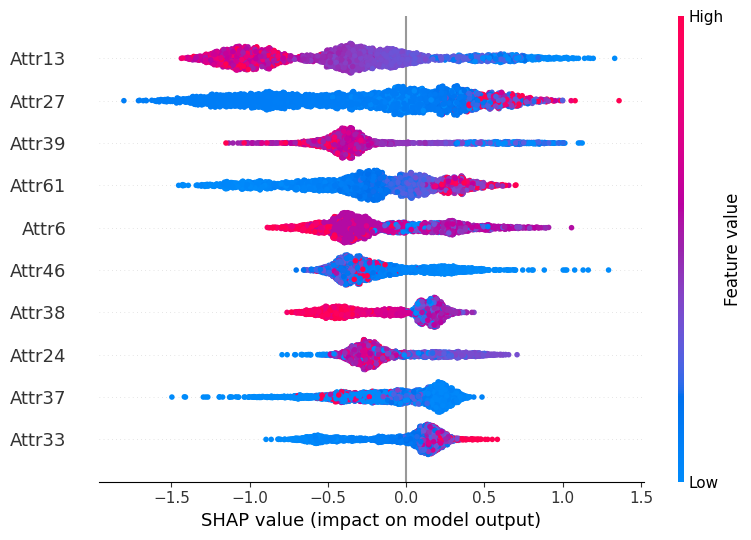

SMOTEENN


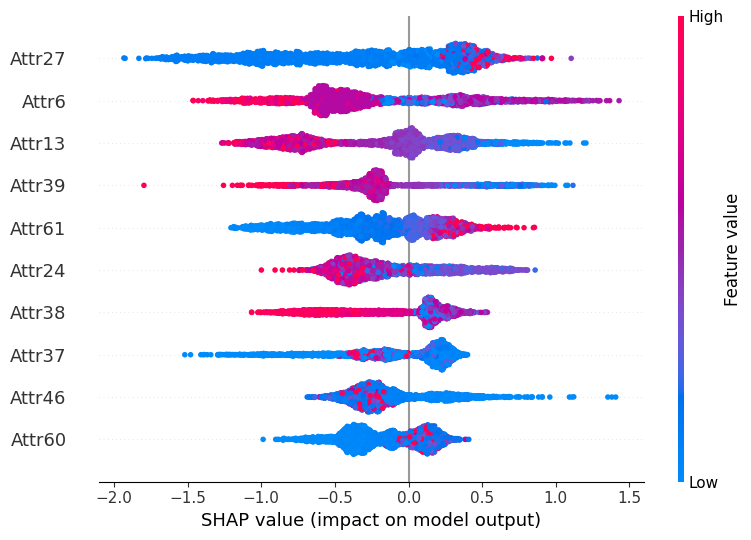

SMOTETomek


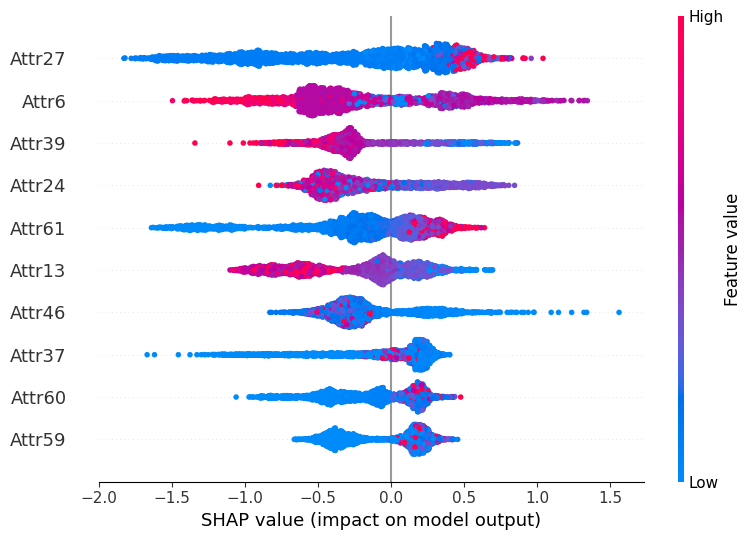

In [ ]:
for x in shap_values_xgb:
    for k in x:
        print(k)
    shap.summary_plot(x[k], X_test, max_display=10)



**ANN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l2


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_ann = []
cm_ann=[]
roc_ann = {}
shap_values_ann = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

        model = Sequential([
              Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
              BatchNormalization(),
              Dropout(0.5),
              Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
              BatchNormalization(),
              Dropout(0.3),
              Dense(1, activation='sigmoid')])

        bankrupt_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
        optimizer = Adam(learning_rate=0.0001, clipvalue=0.5)
        model.compile(
             optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['Recall', 'Precision'])


        y_prob = model.predict(X_test_scaled).flatten()
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_ann.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_ann.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_ann[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")


Using SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ SMOTE completed

Using BorderlineSMOTE...
 1/62 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ BorderlineSMOTE completed

Using ADASYN...
 1/62 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
✅ ADASYN completed

Using SVMSMOTE...
 1/62 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ SVMSMOTE completed

Using SMOTEENN...
 1/62 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ SMOTEENN completed

Using SMOTETomek...
 1/62 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_ann = pd.DataFrame(results_ann)

# Round for readability
results_df_ann = results_df_ann.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_ann)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.0572,0.0528,1.0000,0.0048,0.1003,0.4617
1,BorderlineSMOTE,0.3839,0.0612,0.7476,0.3637,0.1132,0.5282
2,ADASYN,0.5539,0.0564,0.4757,0.5582,0.1008,0.4848
3,SVMSMOTE,0.8315,0.1073,0.3010,0.8610,0.1582,0.5923
4,SMOTEENN,0.8392,0.1015,0.2621,0.8712,0.1463,0.5863
5,SMOTETomek,0.8372,0.1058,0.2816,0.8680,0.1538,0.5833


SMOTE


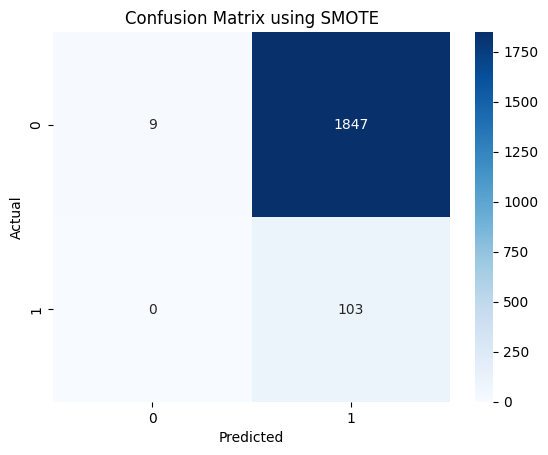

BorderlineSMOTE


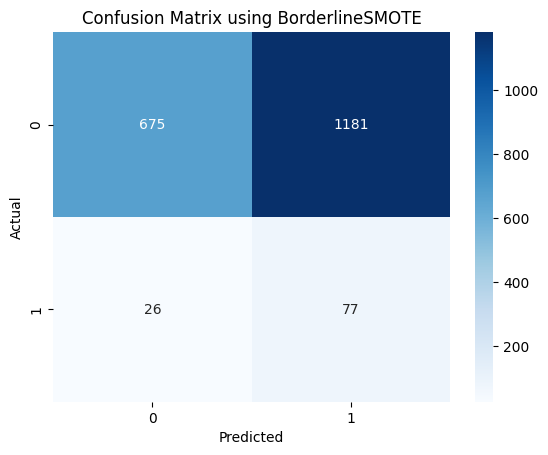

ADASYN


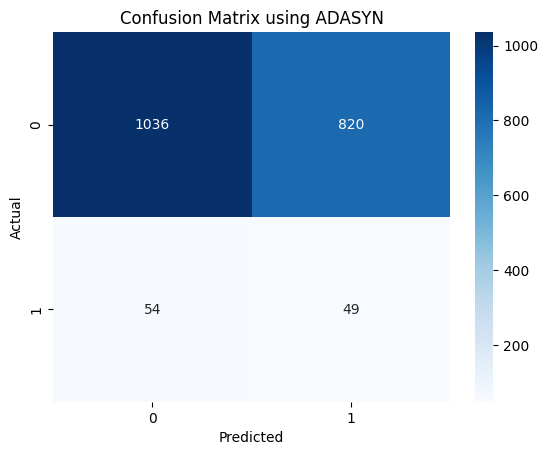

SVMSMOTE


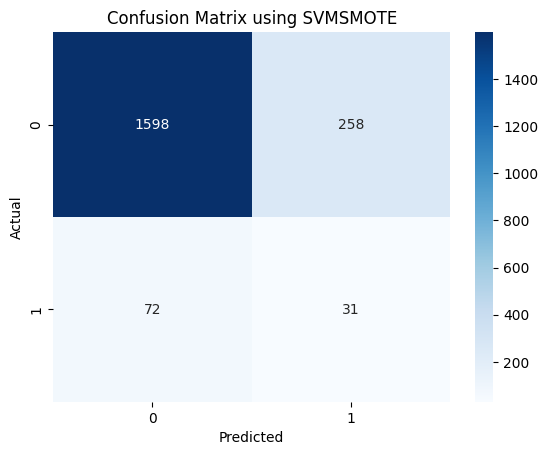

SMOTEENN


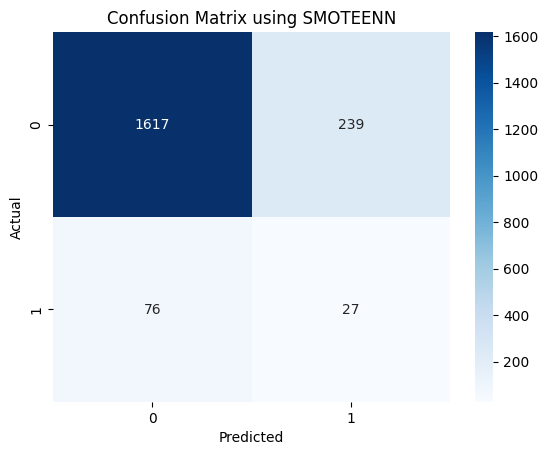

SMOTETomek


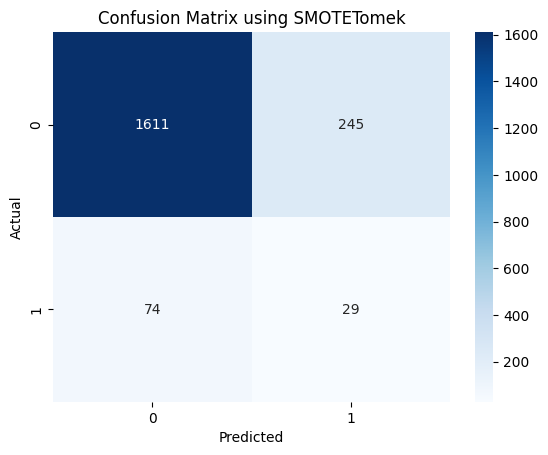

In [ ]:
#confusion matrix plot
for x in cm_ann:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

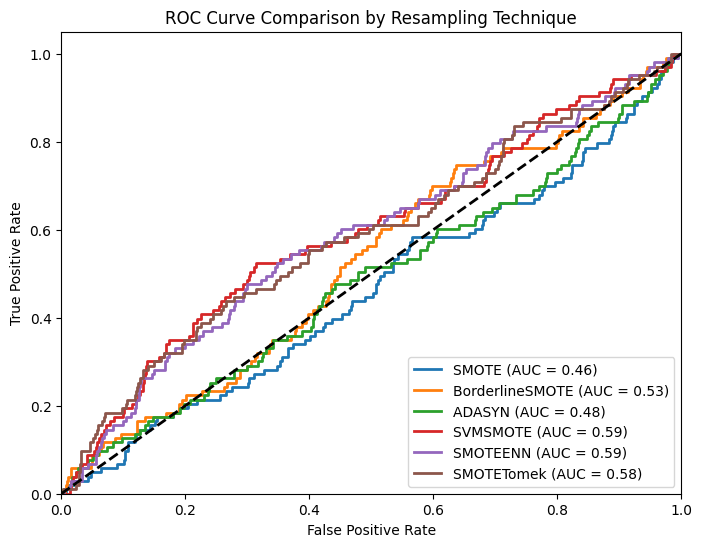

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_ann.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**MLP (6 Layers)**

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_mlp = []
cm_mlp=[]
roc_mlp = {}
shap_values_mlp = []

for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X1_resampled, y1_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # Define a 6-layer MLP
        model = Sequential([
            Dense(128, activation='relu', input_dim=X1_resampled.shape[1]),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X1_resampled, y1_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_mlp.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_mlp.append({name:cm})

         # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_mlp[name] = (fpr, tpr, roc_auc_score(y_test, y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_mlp.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Create DataFrame
results_df_mlp= pd.DataFrame(results_mlp)

# Round for readability
results_df_mlp = results_df_mlp.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_mlp)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8469,0.1495,0.4078,0.8712,0.2188,0.6910
1,BorderlineSMOTE,0.7973,0.1231,0.4660,0.8157,0.1947,0.7304
2,ADASYN,0.6621,0.0884,0.5825,0.6665,0.1535,0.6831
3,SVMSMOTE,0.8760,0.1569,0.3107,0.9073,0.2085,0.6910
4,SMOTEENN,0.7611,0.1109,0.5049,0.7753,0.1818,0.6999
5,SMOTETomek,0.7407,0.1053,0.5243,0.7527,0.1753,0.6797


SMOTE


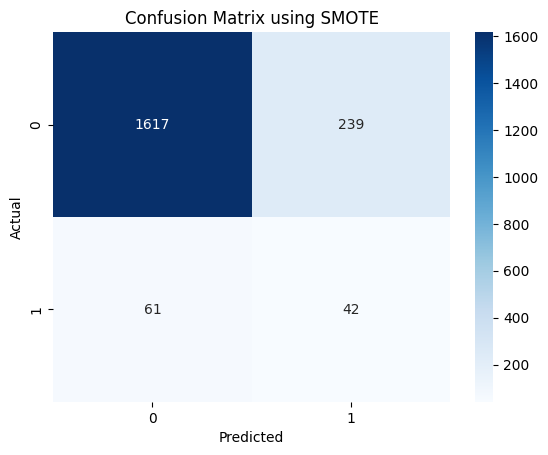

BorderlineSMOTE


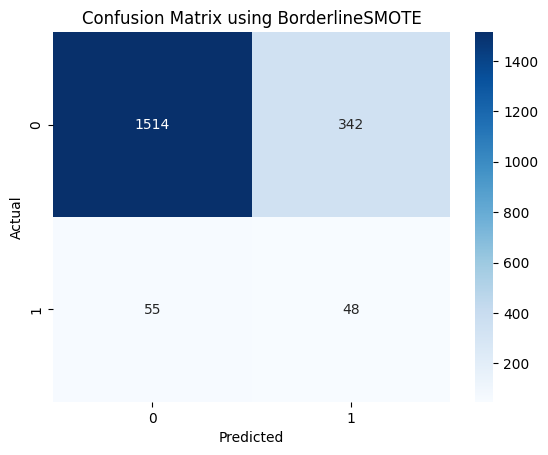

ADASYN


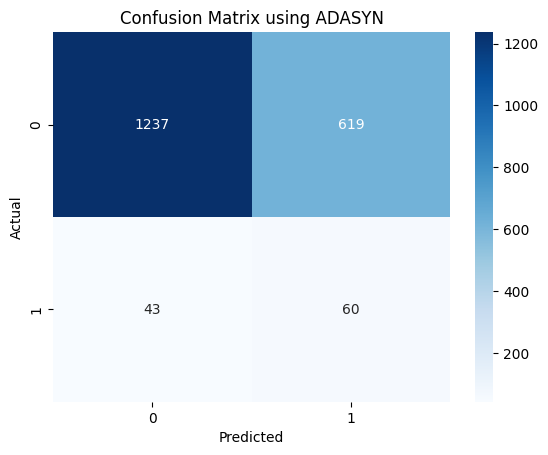

SVMSMOTE


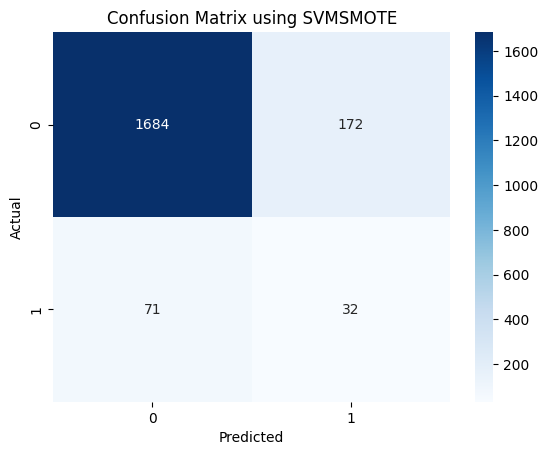

SMOTEENN


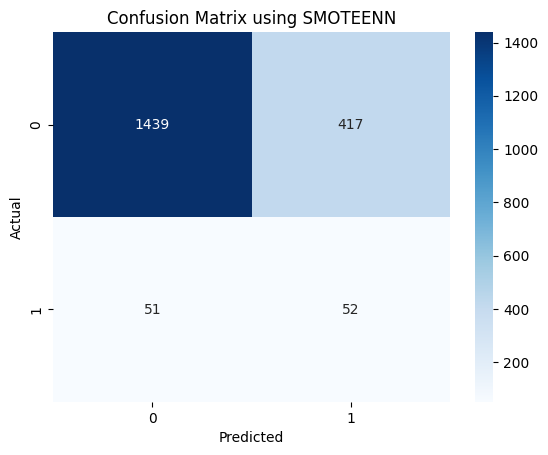

SMOTETomek


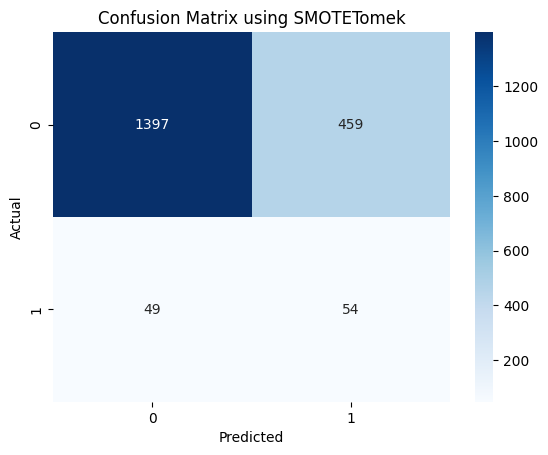

In [ ]:
#confusion matrix plot
for x in cm_mlp:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

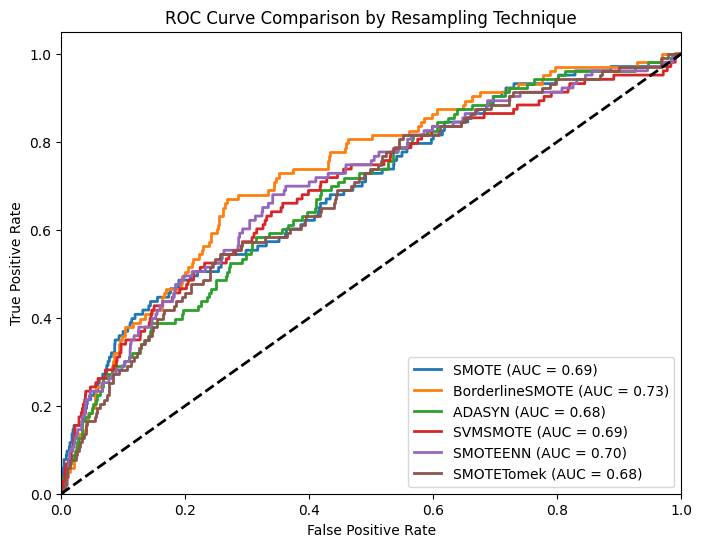

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_mlp.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**CNN**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_cnn = []
cm_cnn=[]
roc_cnn = {}
shap_values_cnn = []


for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # 1D CNN
        model = Sequential([
              Conv1D(filters=64, kernel_size=3, activation='relu',
                     input_shape=(X_train.shape[1], 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.4),

                     Conv1D(filters=128, kernel_size=2, activation='relu'),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.3),

                     Flatten(),

                     Dense(64, activation='relu'),
                     BatchNormalization(),
                     Dropout(0.3),

                    Dense(1, activation='sigmoid')])

        model.compile( optimizer=Adam(learning_rate=0.0005),
                      loss='binary_crossentropy',
                      metrics=['Recall', 'Precision'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X_resampled, y_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_cnn.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_cnn.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
        roc_cnn[name] = (fpr, tpr, roc_auc_score(y_test,  y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_cnn.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Create DataFrame
results_df_cnn= pd.DataFrame(results_cnn)

# Round for readability
results_df_cnn = results_df_cnn.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_cnn)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.7928,0.1401,0.5728,0.8050,0.2252,0.7458
1,BorderlineSMOTE,0.8244,0.1403,0.4563,0.8448,0.2146,0.7385
2,ADASYN,0.8142,0.1405,0.4951,0.8319,0.2189,0.7399
3,SVMSMOTE,0.8458,0.1459,0.3981,0.8707,0.2135,0.7419
4,SMOTEENN,0.6983,0.1052,0.6311,0.7020,0.1803,0.7461
5,SMOTETomek,0.6886,0.1058,0.6602,0.6902,0.1823,0.7312


SMOTE


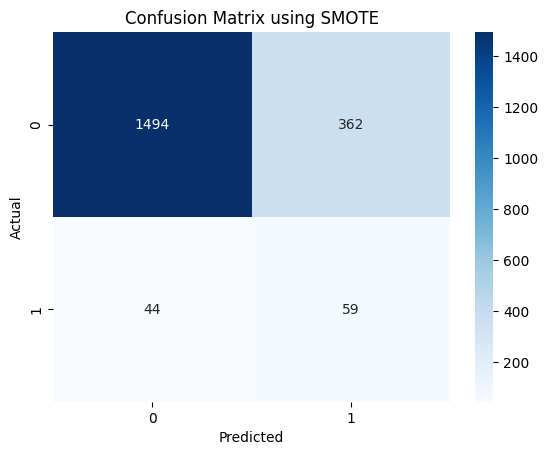

BorderlineSMOTE


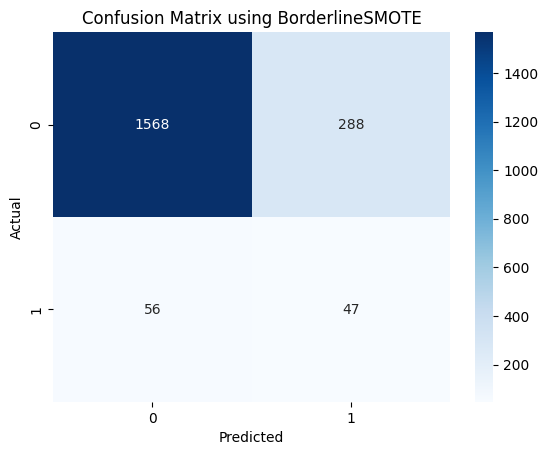

ADASYN


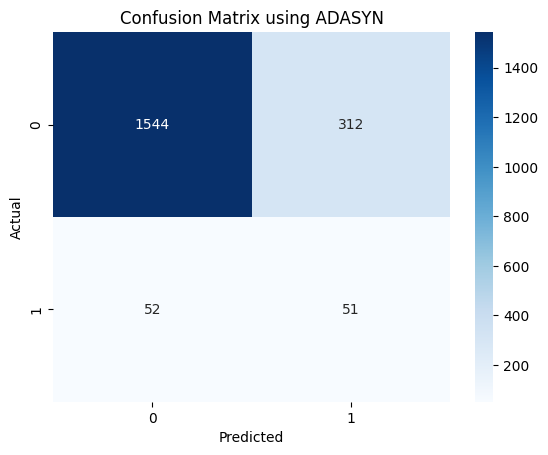

SVMSMOTE


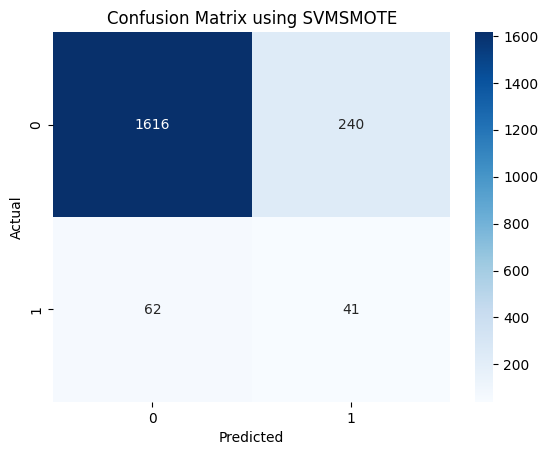

SMOTEENN


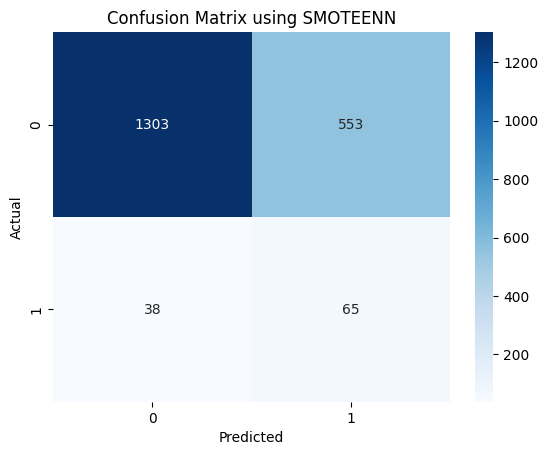

SMOTETomek


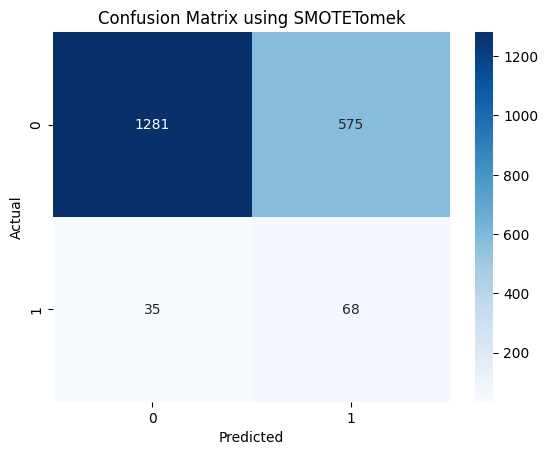

In [ ]:
#confusion matrix plot
for x in cm_cnn:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

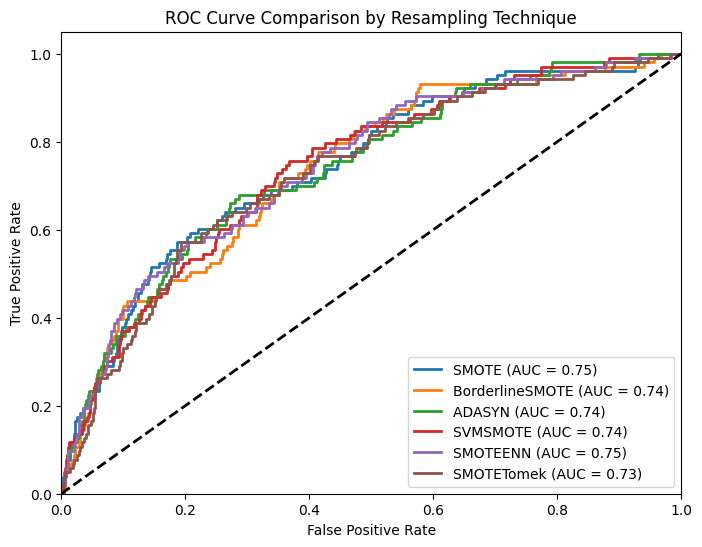

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_cnn.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()